<a href="https://colab.research.google.com/github/Raphilsks86/ETL-de-APIs/blob/main/ETL_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
#Importando as bibliotecas:

import requests
import pandas as pd


In [24]:
#Fazendo a requisição na API com o endpoint necessário:

url = ('https://fakestoreapi.com/products')

In [25]:
response = requests.get(url)
if response.status_code == 200:
  print("Endpoint válido. Dados recebidos:")
  print(response.json()[:2])
else:
  print("Erro ao acessar endpoint", response.status_code)

Endpoint válido. Dados recebidos:
[{'id': 1, 'title': 'Fjallraven - Foldsack No. 1 Backpack, Fits 15 Laptops', 'price': 109.95, 'description': 'Your perfect pack for everyday use and walks in the forest. Stash your laptop (up to 15 inches) in the padded sleeve, your everyday', 'category': "men's clothing", 'image': 'https://fakestoreapi.com/img/81fPKd-2AYL._AC_SL1500_.jpg', 'rating': {'rate': 3.9, 'count': 120}}, {'id': 2, 'title': 'Mens Casual Premium Slim Fit T-Shirts ', 'price': 22.3, 'description': 'Slim-fitting style, contrast raglan long sleeve, three-button henley placket, light weight & soft fabric for breathable and comfortable wearing. And Solid stitched shirts with round neck made for durability and a great fit for casual fashion wear and diehard baseball fans. The Henley style round neckline includes a three-button placket.', 'category': "men's clothing", 'image': 'https://fakestoreapi.com/img/71-3HjGNDUL._AC_SY879._SX._UX._SY._UY_.jpg', 'rating': {'rate': 4.1, 'count': 259

In [26]:
data = response.json()

In [27]:
#Convertendo para DataFrame:

df = pd.DataFrame(data)

In [28]:
#Salvando como arquivo .csv:

df.to_csv("products_data.csv", index = False)
print("Arquivo CSV criado com sucesso!")

Arquivo CSV criado com sucesso!


In [29]:
#Verificando as 5 primeiras linhas do arquivo:

df.head()

,id,title,price,description,category,image,rating
0,1,"Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...",109.95,Your perfect pack for everyday use and walks i...,men's clothing,https://fakestoreapi.com/img/81fPKd-2AYL._AC_S...,"{'rate': 3.9, 'count': 120}"
1,2,Mens Casual Premium Slim Fit T-Shirts,22.30,"Slim-fitting style, contrast raglan long sleev...",men's clothing,https://fakestoreapi.com/img/71-3HjGNDUL._AC_S...,"{'rate': 4.1, 'count': 259}"
2,3,Mens Cotton Jacket,55.99,great outerwear jackets for Spring/Autumn/Wint...,men's clothing,https://fakestoreapi.com/img/71li-ujtlUL._AC_U...,"{'rate': 4.7, 'count': 500}"
3,4,Mens Casual Slim Fit,15.99,The color could be slightly different between ...,men's clothing,https://fakestoreapi.com/img/71YXzeOuslL._AC_U...,"{'rate': 2.1, 'count': 430}"
4,5,John Hardy Women's Legends Naga Gold & Silver ...,695.00,"From our Legends Collection, the Naga was insp...",jewelery,https://fakestoreapi.com/img/71pWzhdJNwL._AC_U...,"{'rate': 4.6, 'count': 400}"


In [30]:
#Confirmando as colunas da tabela:

df.columns

Index(['id', 'title', 'price', 'description', 'category', 'image', 'rating'], dtype='object')

In [31]:
#Checando as informações da BD:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           20 non-null     int64  
 1   title        20 non-null     object 
 2   price        20 non-null     float64
 3   description  20 non-null     object 
 4   category     20 non-null     object 
 5   image        20 non-null     object 
 6   rating       20 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.2+ KB


In [32]:
# Preparando a transformação os dados:

def transform_data():
  df = pd.read_csv("products_data.csv")

In [33]:
# Limpeza da base de dados:

df = df[["id", "title", "price", "category"]]
df["price"] = df["price"].astype(float)
df["category"] = df["category"].str.lower()

In [34]:
#Agregação - Total de vendas por categoria:

df_agg = df.groupby ("category") ["price"].sum().reset_index()
df.to_csv("products_data.csv", index=False)
df_agg.to_csv("agregando_products_data.csv", index=False)
print("Dados transformados com sucesso")


Dados transformados com sucesso


In [45]:
# Função de carga:
import sqlite3

In [46]:
def load_data ():
  conn = sqlite3.connect("products_database.db")
  sqlite3.Cursor = conn.cursor()

In [64]:
from google.colab import drive
drive.mount("/content/drive")
df.to_csv("/content/products_data.csv", index = False)
conn = sqlite3.connect("products_database.db")
drive.mount("/content/drive", force_remount=True)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mounted at /content/drive


In [65]:
# Modelagem e transformação da BD:

df

,id,price,category
0,1,109.95,men's clothing
1,2,22.30,men's clothing
2,3,55.99,men's clothing
3,4,15.99,men's clothing
4,5,695.00,jewelery
5,6,168.00,jewelery
6,7,9.99,jewelery
7,8,10.99,jewelery
8,9,64.00,electronics
9,10,109.00,electronics


In [66]:
# Describe:

df.describe().round(1)

,id,price
count,20.0,20.0
mean,10.5,162.0
std,5.9,272.2
min,1.0,8.0
25%,5.8,15.2
50%,10.5,56.5
75%,15.2,111.0
max,20.0,1000.0


In [67]:
# Selecionar somente a coluna desejada:
df.category

,category
0,men's clothing
1,men's clothing
2,men's clothing
3,men's clothing
4,jewelery
5,jewelery
6,jewelery
7,jewelery
8,electronics
9,electronics


In [68]:
# Calculando a quantidade de saídas por categoria:
df.category.value_counts()

,count
category,
women's clothing,6
electronics,6
jewelery,4
men's clothing,4


In [70]:
# Listagem dos preços em ordem crescente:
df.price.sort_values()

,price
18,7.95
17,9.85
6,9.99
7,10.99
19,12.99
3,15.99
1,22.30
15,29.95
16,39.99
2,55.99


In [73]:
# Importando bibliotecas para utilizar gráficos:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from termcolor import colored


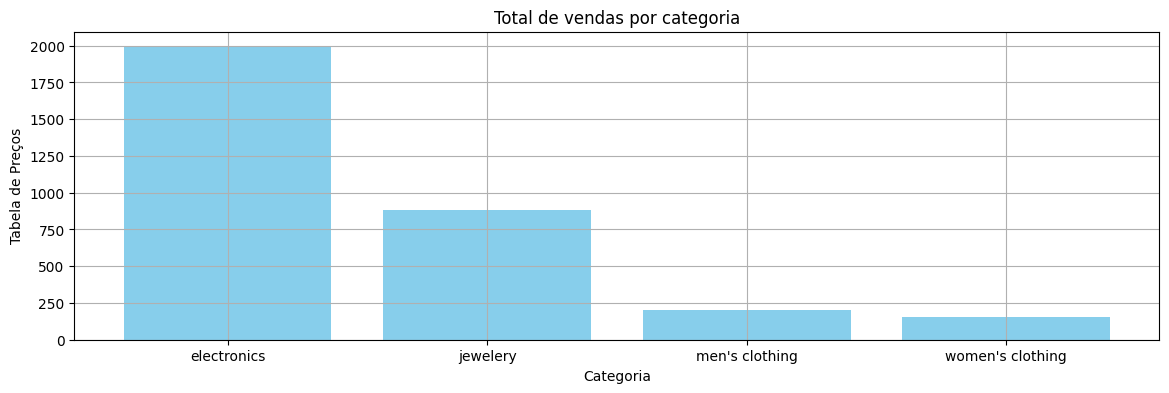

In [74]:
#Preparando o gráfico:
df_agg = pd.read_csv("agregando_products_data.csv")
plt.figure(figsize = (14,4))

#Configurando os dados:
plt.bar(df_agg["category"], df_agg["price"], color = "skyblue")
plt.xlabel("Categoria")
plt.ylabel("Tabela de Preços")
plt.title("Total de vendas por categoria")
plt.xticks()
plt.grid(True)
plt.show()